In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [187]:
df=pd.read_csv("wine-reviews.csv",usecols=['country','description', 'points','price','variety','winery'])

In [188]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [189]:
df=df.dropna(subset=['description','points'])
#this is for dropping null wali values

In [190]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


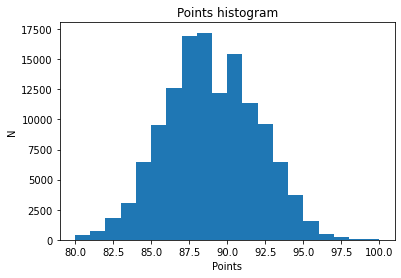

In [191]:
plt.hist(df.points,bins=20)
plt.title('Points histogram')
plt.ylabel("N")
plt.xlabel("Points")
plt.show()

In [192]:
# We are using supervised version of ML
# we check the accuracy
# We are using nueral network model of machine learning to train our model
# which will give us the desired output based on our input
# So the python library to help us use nueral networks is tensorflow

In [193]:
df["label"]=(df.points>=90).astype(int)
df=df[["description","label"]]

In [194]:
#Now lets split dataset into dataset, val, test
train, val, test= np.split(df.sample(frac=1),[int(0.8*len(df)), int(0.9*len(df))])

In [195]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df["description"]
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [196]:
train_data=df_to_dataset(train)
valid_data=df_to_dataset(val)
test_data=df_to_dataset(test)

In [197]:
#Embedding + Model

In [198]:
#here we are transforming our text to numbers
embedding="https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer=hub.KerasLayer(embedding,dtype=tf.string, trainable =True)

In [199]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.41293886, -0.38765338, -0.45423535, ..., -0.15804246,
        -0.0748497 , -0.21491608],
       [ 0.41937992, -0.32332948, -0.15408197, ..., -0.12462701,
        -0.03698292, -0.03958664],
       [ 0.26188833, -0.13652202,  0.14412805, ..., -0.01743777,
        -0.24883159,  0.11341512],
       ...,
       [ 0.06820921, -0.3926477 , -0.22250468, ...,  0.08238811,
        -0.03481418, -0.01971297],
       [ 0.25081405, -0.30098203, -0.15895636, ..., -0.00190993,
        -0.07186969, -0.23928538],
       [ 0.5199652 , -0.20983233, -0.10410105, ...,  0.02347737,
        -0.30781928, -0.04214525]], dtype=float32)>

In [200]:
model=tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [201]:
#Now lets compile our model
#We need an optimizer also. Tensorflow has a lot of them, but the most
#famous is Adam, so I am going to use that
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              #this is our loss function
              #since I am using Binary Classification, so I will use
              #BinaryCrossentropy
              metrics=['accuracy'])
            #Just added a metric(column) to know the accuracy of our model
#this is our optimizer

In [202]:
model.evaluate(train_data)

102/102 [==============================] - 1s 9ms/step - loss: 0.7003 - accuracy: 0.4022


[0.7003278732299805, 0.402160108089447]

In [203]:
model.evaluate(valid_data)

13/13 [==============================] - 0s 9ms/step - loss: 0.7004 - accuracy: 0.4016


[0.7004097700119019, 0.4015541970729828]

In [204]:
history=model.fit(train_data, epochs=5,validation_data=valid_data)

Epoch 1/5
102/102 [==============================] - 79s 763ms/step - loss: 0.6243 - accuracy: 0.6187 - val_loss: 0.5213 - val_accuracy: 0.7466
Epoch 2/5
102/102 [==============================] - 78s 766ms/step - loss: 0.4755 - accuracy: 0.7769 - val_loss: 0.4040 - val_accuracy: 0.8094
Epoch 3/5
102/102 [==============================] - 81s 797ms/step - loss: 0.3970 - accuracy: 0.8285 - val_loss: 0.3817 - val_accuracy: 0.8229
Epoch 4/5
102/102 [==============================] - 86s 837ms/step - loss: 0.3614 - accuracy: 0.8463 - val_loss: 0.3739 - val_accuracy: 0.8256
Epoch 5/5
102/102 [==============================] - 81s 790ms/step - loss: 0.3385 - accuracy: 0.8580 - val_loss: 0.3749 - val_accuracy: 0.8289


In [205]:
#This is an eg of overfitting
#It means that our model knows how to predict the data, but it generalises it really badly

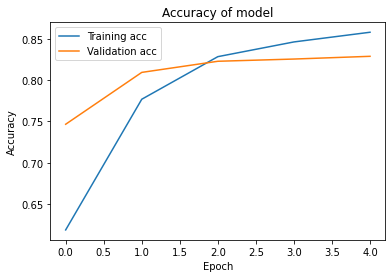

In [206]:
plt.plot(history.history['accuracy'], label="Training acc")
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.title("Accuracy of model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

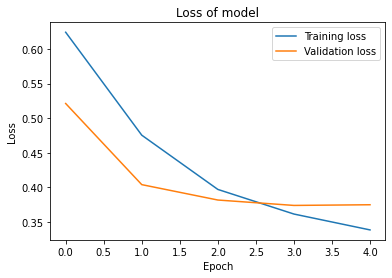

In [207]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title("Loss of model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [208]:
model.evaluate(test_data)

13/13 [==============================] - 1s 87ms/step - loss: 0.3795 - accuracy: 0.8289


[0.3794548213481903, 0.8288967609405518]

In [208]:
#What we Learnt?
# 1. How to implement Feedforward Nueral Network with numerical data
# 2. Using tensorflow with text classification and tried to figure out
# whether or not wine reviews is lower_tier or Higher_tier